In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\TensorFlow_FILES\TensorFlow_FILES\DATA\lending_club_loan_two.csv')
#, index_col = 'LoanStatNew'

In [3]:
df.shape

(396030, 27)

In [4]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.loan_status

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

# 1. EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

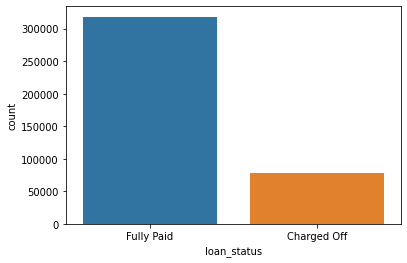

In [7]:
sns.countplot(x = 'loan_status',data = df)

In [8]:
df.loan_amnt

0         10000.0
1          8000.0
2         15600.0
3          7200.0
4         24375.0
           ...   
396025    10000.0
396026    21000.0
396027     5000.0
396028    21000.0
396029     2000.0
Name: loan_amnt, Length: 396030, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

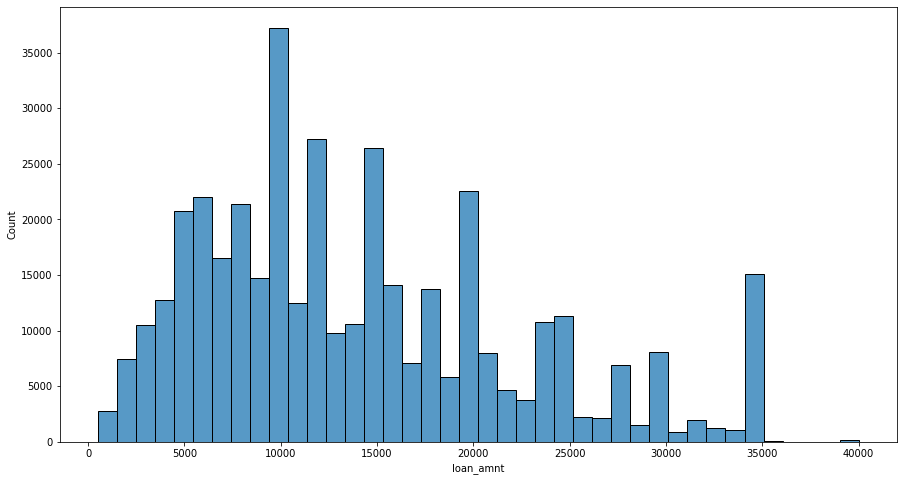

In [9]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'loan_amnt', data=df, kde=False, bins = 40)

In [10]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

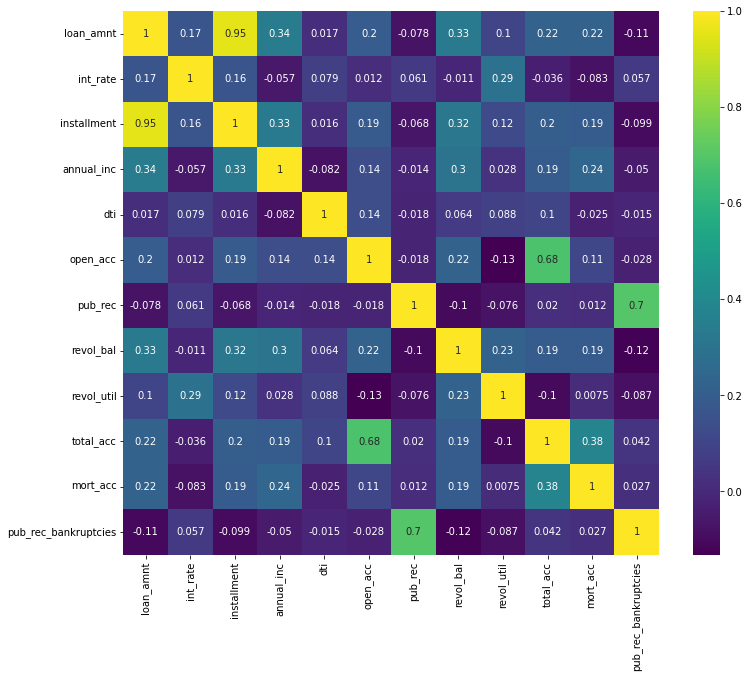

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')

Installment is the monthly payment owed by the borrower if the loan originates.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

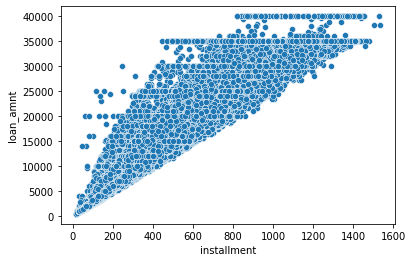

In [12]:
sns.scatterplot(x = 'installment', y = 'loan_amnt', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

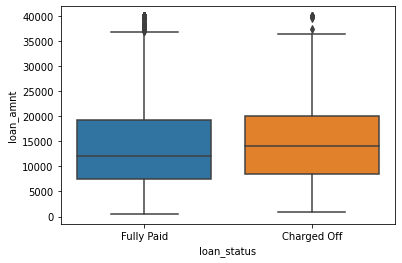

In [13]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data=df)

In [14]:
df.groupby(df.loan_status)['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [16]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

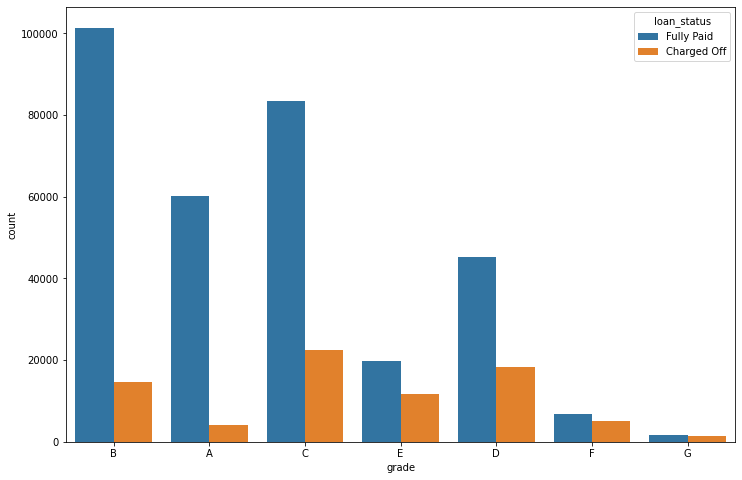

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade', data=df, hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

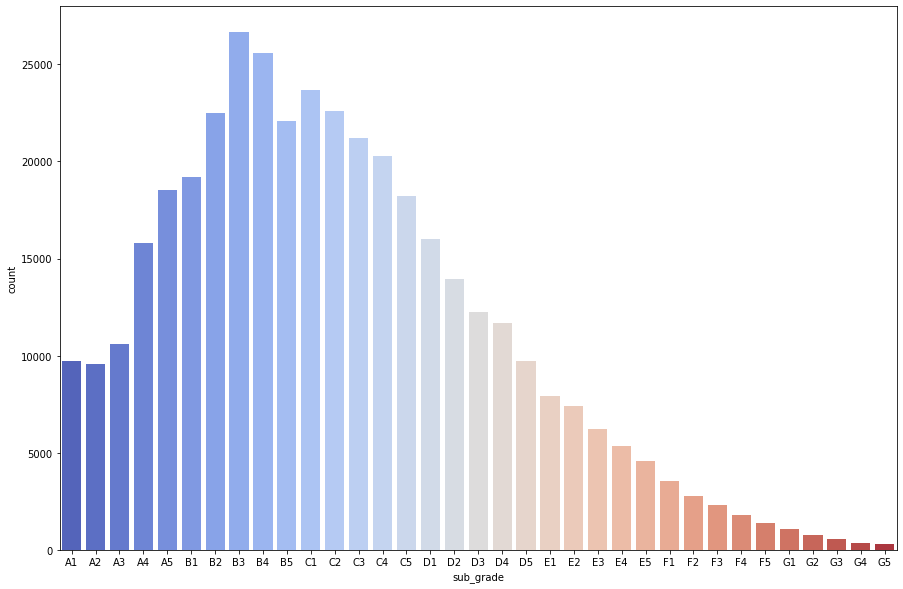

In [18]:
plt.figure(figsize=(15,10))
subgrade_order = sorted(df['sub_grade'].unique()) 
sns.countplot(x='sub_grade', data=df, order = subgrade_order, palette = 'coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

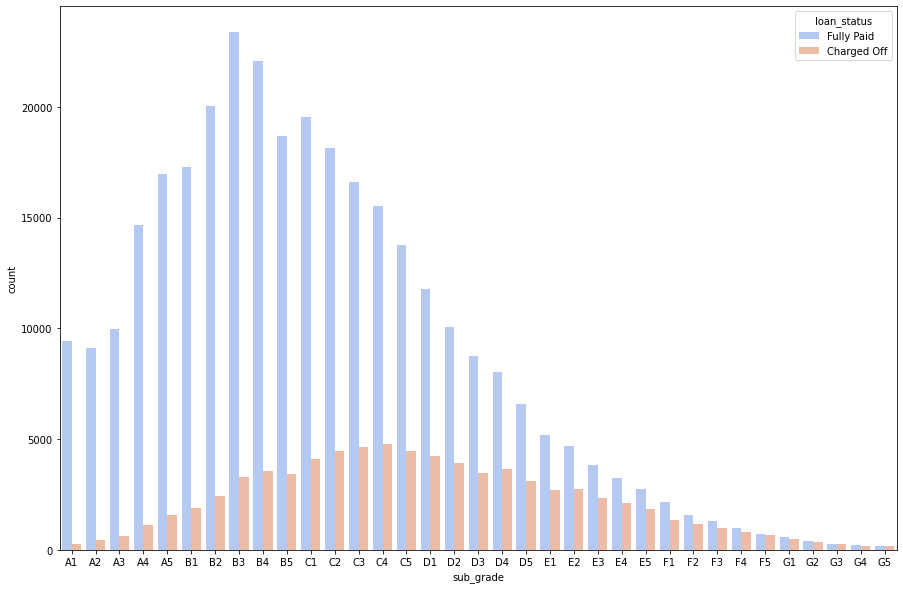

In [19]:
plt.figure(figsize=(15,10))
subgrade_order = sorted(df['sub_grade'].unique()) 
sns.countplot(x='sub_grade', data=df, order = subgrade_order, palette = 'coolwarm', hue='loan_status')

In [20]:
fg_subgrades = df[(df.grade == 'F') | (df.grade == 'G')]

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

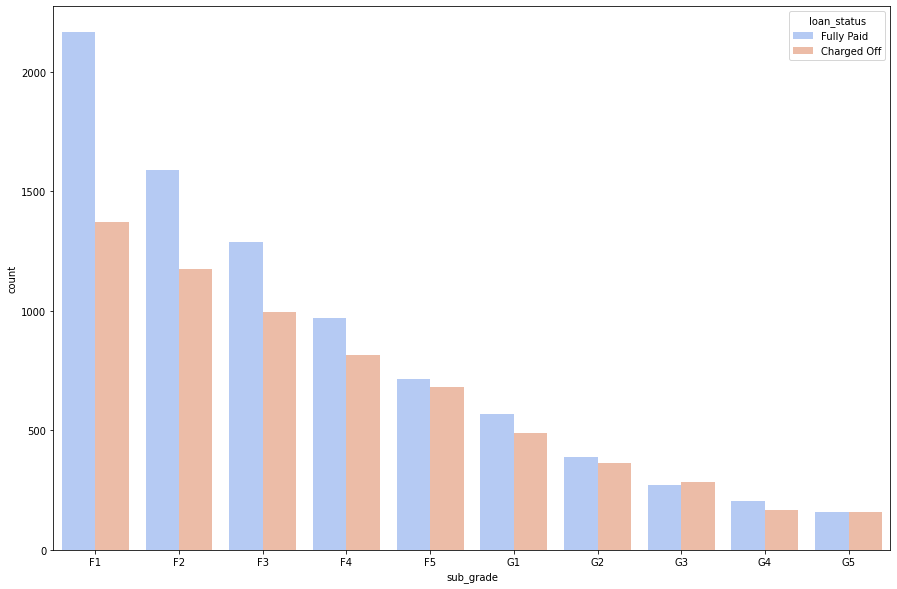

In [21]:
plt.figure(figsize=(15,10))
subgrade_order = sorted(fg_subgrades['sub_grade'].unique()) 
sns.countplot(x='sub_grade', data=fg_subgrades, order = subgrade_order, palette = 'coolwarm', hue='loan_status')

In [22]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [23]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

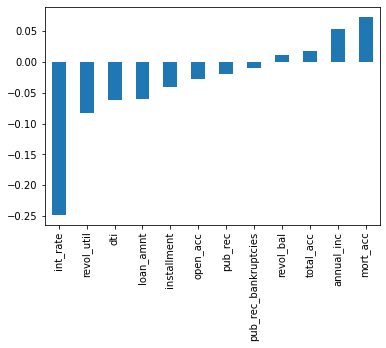

In [24]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

# 2. DATA PREPROCESSING

Looking at MISSING DATA

In [25]:
len(df)

396030

In [26]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [27]:
df['emp_title'].nunique()

173105

In [28]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

OBSERVATION : There are 173105 different unique job titles in our data. And these number of job titles are too high in number to realistically 
convert into dummy variable features for using in our model. Therefore we remove the job title column.

In [29]:
df = df.drop('emp_title', axis=1)

In [30]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [31]:
emplength_order = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years'
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

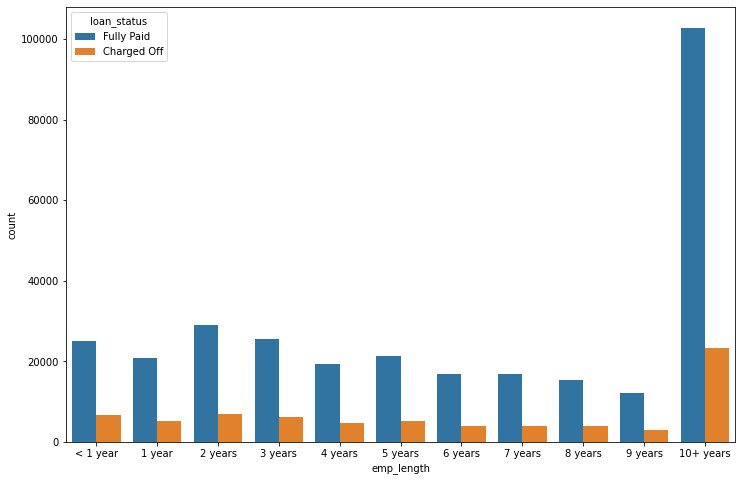

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'emp_length', data=df, order = emplength_order, hue = 'loan_status')

OBSERVATION : Majority of people have 10+ years of employment.

In [33]:
chargedoff = df[df['loan_status']=='Charged Off'].groupby(['emp_length']).count().loan_status

In [34]:
paid = df[df['loan_status']=='Fully Paid'].groupby(['emp_length']).count().loan_status

In [35]:
emp = chargedoff/paid

<AxesSubplot:xlabel='emp_length'>

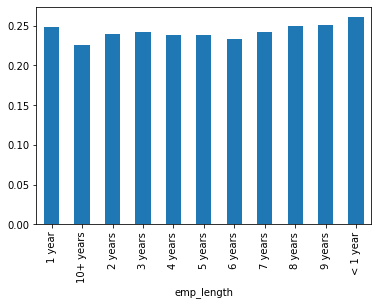

In [36]:
emp.plot(kind = 'bar')

Percent of people who have been Charged off is quite uniform across employment length categories. 
Therefore, it is not a useful feature in predicting loan status.
We will drop this column.

In [37]:
df = df.drop('emp_length' ,axis=1)

In [38]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [39]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [40]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [41]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [42]:
df = df.drop('title', axis=1)

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Approximately 10 % of rows have missing values for mortgage accounts. 
Dropping all these rows will result in a lot of loss of data.

In [44]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

We figure out which feature has the most correlation with the mortgage accounts feature and use that to fill
the missing values of mort_acc column.

In [45]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

OBSERVATION : The total accounts has a high correlation with mortgage accounts.

In [46]:
df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [47]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

We define a function to fill the missing values of mortgage accounts 
by using the total accounts feature and replacing the missing values with the mean number of mortgage accounts for that number of total accounts.

In [48]:
def fill_mort_acc(total_acc, mort_acc) :
    if np.isnan(mort_acc) :
        return total_acc_avg[total_acc]
    else :
        return mort_acc

In [49]:
df['mort_acc'] = df.apply(lambda x : fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [50]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Number of missing values for revol_util and pub_rec_bankruptcies is very low and we can drop these columns without major consequences on our model.

In [51]:
df = df.dropna()

In [52]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [53]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

CONVERTING THE TERM FEATURE

In [54]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

Term is the number of payments on the loan.

In [55]:
df['term'] = df['term'].apply(lambda x : int(x[:3]))

In [56]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

This is now a numeric column that we can pass into tensorflow.

In [57]:
df = df.drop('grade',axis=1)

ONE-HOT ENCODING :
CONVERT Sub-grade into dummy variables

In [58]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [59]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [60]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [61]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [62]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [63]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status']], drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status'],axis=1),dummies],axis=1)

Looking at Home Ownership

In [64]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Reducing the number of categories because the number of rows with 'ANY' and 'NONE' are very less
and can be put under the 'OTHER' column

In [65]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [66]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [67]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1),dummies], axis=1)

In [68]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [69]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [70]:
dummies = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df.drop('purpose', axis=1),dummies], axis=1)

## FEATURE ENGINEERING 
Creating a new feature using address which will contain the zipcode, extracted from the address.

In [72]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [73]:
df['address'] = df['address'].apply(lambda x : x[-5:])

In [74]:
df['address']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 395219, dtype: object

In [75]:
df['zipcode'] = df['address']

In [76]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

### One hot encoding the zipcodes of customers

In [77]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df = pd.concat([df.drop('zipcode',axis=1),dummies], axis=1)

In [78]:
df = df.drop('address', axis=1)

issue_d = Month the loan was funded

In [79]:
## The model is to predict if the person will payback the loan, before lending them one.
## So this feature is redundant.
df = df.drop('issue_d', axis=1)

earliest_cr_line = Month the borrower's earliest reported credit line was opened
FEATURE ENGINEERING : Create new feature extracting the year from this date.

In [80]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [81]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : x[-4:])

In [82]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [83]:
df['earliest_cr_year'] =df['earliest_cr_line']

In [84]:
df = df.drop('earliest_cr_line', axis=1)

# TRAIN TEST SPLIT

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
df = df.drop('loan_status',axis=1)

In [87]:
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,1,0,0,0,0,0,1990


In [88]:
X = df.drop('loan_repaid', axis=1).values

In [89]:
X

array([[10000.0, 36, 11.44, ..., 0, 0, '1990'],
       [8000.0, 36, 11.99, ..., 0, 0, '2004'],
       [15600.0, 36, 10.49, ..., 0, 0, '2007'],
       ...,
       [5000.0, 36, 9.99, ..., 0, 0, '1997'],
       [21000.0, 60, 15.31, ..., 0, 0, '1990'],
       [2000.0, 36, 13.61, ..., 0, 0, '1998']], dtype=object)

In [90]:
y = df['loan_repaid'].values

In [91]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
df2 = df.sample(frac=0.1)

In [93]:
len(df2)

39522

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## NORMALIZING THE DATA
We use MinMaxScaler to normalize the feature data X-train and X_test

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train[0]

array([9700.0, 36, 17.27, 347.14, 30000.0, 18.0, 10.0, 0.0, 9753.0, 51.9,
       11.0, 1.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, '2006'], dtype=object)

In [98]:
X_train = scaler.fit_transform(X_train)

In [99]:
X_test = scaler.transform(X_test)

## CREATING THE MODEL 

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [101]:
X_train.shape

(316175, 78)

In [102]:
# Number of features are 78. Number of layers should be >= no. of features

In [103]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [104]:
model.fit(X_train, y_train, epochs = 25, batch_size=256, validation_data = (X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 9s 6ms/step - loss: 0.2972 - val_loss: 0.2644
Epoch 2/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2649 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2627 - val_loss: 0.2633
Epoch 4/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2619 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2611 - val_loss: 0.2621
Epoch 6/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2603 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2601 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2596 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2594 - val_loss: 0.2610
Epoch 10/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.259

## EVALUATION OF MODEL

In [105]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

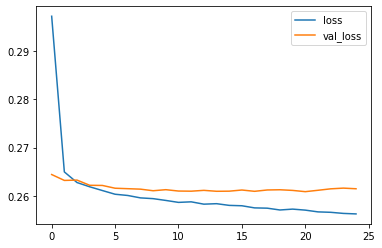

In [106]:
losses.plot()

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
predictions = model.predict(X_test)


2471/2471 [==============================] - 5s 2ms/step


In [109]:
pred = (predictions > 0.5).astype("int32")

In [110]:
pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [111]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [112]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [113]:
317696/len(df)

0.8038479931379817

In [114]:
## The data is already skewed. So 80% accuracy should be the bottom threshold.
## We observe a recall of 45% and f1-score of 61%.
## Accuracy is 89% which is better than 80% 

In [115]:
confusion_matrix(y_test, pred)

array([[ 7202,  8456],
       [  404, 62982]], dtype=int64)

In [116]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))
## Allocated a random index

test_customer = df.drop('loan_repaid', axis=1).iloc[random_ind]

In [117]:
test_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                     0
70466                     0
86630                     0
93700                     0
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [121]:
test_customer = scaler.transform(test_customer.values.reshape([1,78]))
# 1. Reshaping the array to put into the model.
# 2. Then normalizing the array.

In [122]:
test_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.07340581,
        0.29530201, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [129]:
pred = (model.predict(test_customer)>0.5).astype("int32")

1/1 [==============================] - 0s 38ms/step


In [131]:
pred

array([[1]])

Model predicts that the person will pay back the loan.

In [134]:
df.iloc[random_ind]['loan_repaid']

1

OBSERVATION : The person has actually paid back the loan, which means our model's prediction was correct.